In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Introduction

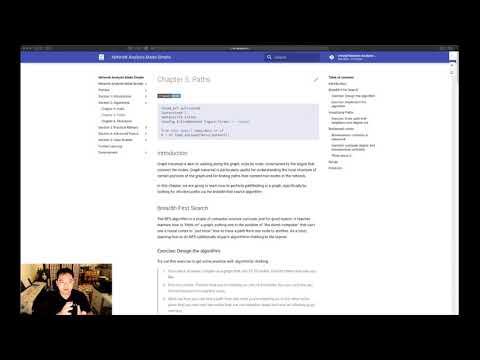

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="JjpbztqP9_0", width="100%")

Graph traversal is akin to walking along the graph, node by node,
constrained by the edges that connect the nodes.
Graph traversal is particularly useful for understanding 
the local structure of certain portions of the graph
and for finding paths that connect two nodes in the network.

In this chapter, we are going to learn how to perform pathfinding in a graph,
specifically by looking for _shortest paths_ via the _breadth-first search_ algorithm.

## Breadth-First Search

The BFS algorithm is a staple of computer science curricula,
and for good reason:
it teaches learners how to "think on" a graph,
putting one in the position of 
"the dumb computer" that can't use a visual cortex to 
"_just know_" how to trace a path from one node to another.
As a topic, learning how to do BFS
additionally imparts algorithmic thinking to the learner.

### Exercise: Design the algorithm

Try out this exercise to get some practice with algorithmic thinking.

> 1. On a piece of paper, conjure up a graph that has 15-20 nodes. Connect them any way you like.
> 1. Pick two nodes. Pretend that you're standing on one of the nodes, but you can't see any further beyond one neighbor away.
> 1. Work out how you can find _a_ path from the node you're standing on to the other node, given that you can _only_ see nodes that are one neighbor away but have an infinitely good memory.

If you are successful at designing the algorithm, you should get the answer below.

In [3]:
import sys
if not (r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple' in sys.path):
    sys.path.insert(0, r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple')
from nams import load_data as cf
G = cf.load_sociopatterns_network()

In [4]:
from nams.solutions.paths import bfs_algorithm

# UNCOMMENT NEXT LINE TO GET THE ANSWER.
bfs_algorithm()

ImportError: cannot import name 'annotate' from 'nxviz' (C:\Users\pui_s\AppData\Local\Programs\Python\Python39\lib\site-packages\nxviz\__init__.py)

In [5]:
from nxviz import highlights

ImportError: cannot import name 'highlights' from 'nxviz' (C:\Users\pui_s\AppData\Local\Programs\Python\Python39\lib\site-packages\nxviz\__init__.py)

### Exercise: Implement the algorithm

> Now that you've seen how the algorithm works, try implementing it!

In [7]:
# FILL IN THE BLANKS BELOW

def path_exists(node1, node2, G):
    """
    This function checks whether a path exists between two nodes (node1, 
    node2) in graph G.
    """
    visited_nodes = []
    queue = [node1]
    
    while len(queue) > 0:
        node = queue.pop(0)
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            visited_nodes.append(node)
            nbrs = [each for each in neighbors if each not in visited_nodes]
            queue = queue + nbrs
    
    print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
    return False


In [ ]:
# UNCOMMENT THE FOLLOWING TWO LINES TO SEE THE ANSWER
from nams.solutions.paths import path_exists
# path_exists??

In [9]:
nx.__version__

'2.5.1'

In [8]:
# CHECK YOUR ANSWER AGAINST THE TEST FUNCTION BELOW
from random import sample
import networkx as nx


def test_path_exists(N):
    """
    N: The number of times to spot-check.
    """
    for i in range(N):
        n1, n2 = sample(G.nodes(), 2)
        assert path_exists(n1, n2, G) == bool(nx.shortest_path(G, n1, n2))
    return True
    
assert test_path_exists(10)

<ipython-input-8-16e6cd0261b0>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  n1, n2 = sample(G.nodes(), 2)


Path exists between nodes 404 and 3
Path exists between nodes 57 and 173
Path exists between nodes 27 and 350
Path exists between nodes 150 and 122
Path exists between nodes 347 and 378
Path exists between nodes 180 and 239
Path exists between nodes 62 and 42
Path exists between nodes 240 and 104
Path exists between nodes 240 and 288
Path exists between nodes 232 and 70


In [10]:
def test_path_not_exist(G):
    g = G.copy()
    g.add_node(1e5)
    assert not path_exists(18, 1e5, g)

test_path_not_exist(G)

Path does not exist between nodes 18 and 100000.0


In [12]:
nx.has_path(G, 400, 1)

True

## Visualizing Paths

One of the objectives of that exercise before was to help you "think on graphs".
Now that you've learned how to do so, you might be wondering,
"How do I visualize that path through the graph?"

Well first off, if you inspect the `test_path_exists` function above,
you'll notice that NetworkX provides a `shortest_path()` function
that you can use. Here's what using `nx.shortest_path()` looks like.

In [11]:
path = nx.shortest_path(G, 7, 400)
path

[7, 51, 188, 230, 335, 400]

As you can see, it returns the nodes along the shortest path,
incidentally in the exact order that you would traverse.

One thing to note, though!
If there are multiple shortest paths from one node to another,
NetworkX will only return one of them.

So how do you draw those nodes _only_?

You can use the `G.subgraph(nodes)`
to return a new graph that only has nodes in `nodes`
and only the edges that exist between them.
After that, you can use any plotting library you like.
We will show an example here that uses nxviz's matrix plot.

Let's see it in action:

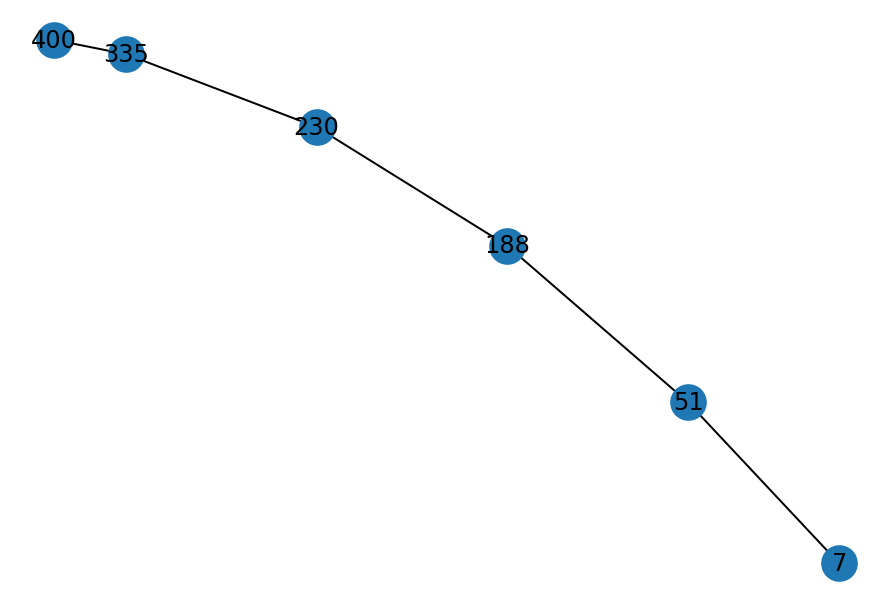

In [16]:
import nxviz as nv
g = G.subgraph(path)
# nv.matrix(g, sort_by="order")
nx.draw(g, with_labels=True)

_Voila!_ Now we have the subgraph (1) extracted and (2) drawn to screen!
In this case, the matrix plot is a suitable visualization for its compactness.
The off-diagonals also show that each node is a neighbor to the next one.

You'll also notice that if you try to modify the graph `g`, say by adding a node:

```python
g.add_node(2048)
```

you will get an error:

```python
---------------------------------------------------------------------------
NetworkXError                             Traceback (most recent call last)
<ipython-input-10-ca6aa4c26819> in <module>
----> 1 g.add_node(2048)

~/anaconda/envs/nams/lib/python3.7/site-packages/networkx/classes/function.py in frozen(*args, **kwargs)
    156 def frozen(*args, **kwargs):
    157     """Dummy method for raising errors when trying to modify frozen graphs"""
--> 158     raise nx.NetworkXError("Frozen graph can't be modified")
    159 
    160 

NetworkXError: Frozen graph can't be modified
```

From the perspective of semantics, this makes a ton of sense:
the subgraph `g` is a perfect subset of the larger graph `G`,
and should not be allowed to be modified
unless the larger container graph is modified.

### Exercise: Draw path with neighbors one degree out

Try out this next exercise:

> Extend graph drawing with the neighbors of each of those nodes.
> Use any of the nxviz plots (`nv.matrix`, `nv.arc`, `nv.circos`);
> try to see which one helps you tell the best story.

In [ ]:
from nams.solutions.paths import plot_path_with_neighbors

### YOUR SOLUTION BELOW


In [ ]:
plot_path_with_neighbors(G, 7, 400)

In this case, we opted for an Arc plot because we only have one grouping of nodes but have a logical way to order them.
Because the path follows the order, the edges being highlighted automatically look like hops through the graph.

## Bottleneck nodes

We're now going to revisit the concept of an "important node",
this time now leveraging what we know about paths.

In the "hubs" chapter, we saw how a node that is "important"
could be so because it is connected to many other nodes.

Paths give us an alternative definition.
If we imagine that we have to pass a message on a graph
from one node to another,
then there may be "bottleneck" nodes
for which if they are removed,
then messages have a harder time flowing through the graph.

One metric that measures this form of importance
is the "betweenness centrality" metric.
On a graph through which a generic "message" is flowing,
a node with a high betweenness centrality
is one that has a high proportion of shortest paths
flowing through it.
In other words, it behaves like a _bottleneck_.

### Betweenness centrality in NetworkX

NetworkX provides a "betweenness centrality" function
that behaves consistently with the "degree centrality" function,
in that it returns a mapping from node to metric:

In [17]:
import pandas as pd

pd.Series(nx.betweenness_centrality(G))

100    0.014809
101    0.001398
102    0.000748
103    0.006735
104    0.001198
         ...   
89     0.000004
91     0.006415
96     0.000323
99     0.000322
98     0.000000
Length: 410, dtype: float64

### Exercise: compare degree and betweenness centrality

> Make a scatterplot of degree centrality on the x-axis
> and betweenness centrality on the y-axis.
> Do they correlate with one another?

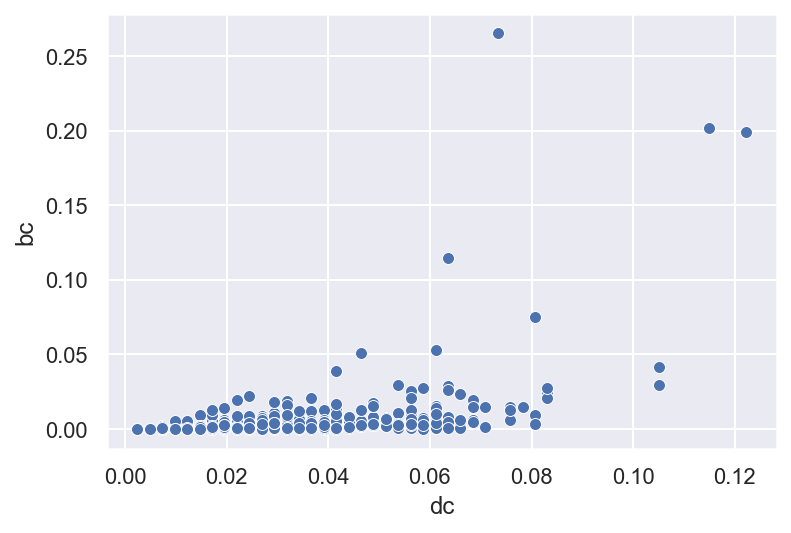

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# YOUR ANSWER HERE:
bc = pd.DataFrame(pd.Series(nx.betweenness_centrality(G)), columns=['bc'])
dc = pd.DataFrame(pd.Series(nx.degree_centrality(G)), columns=['dc'])
df = bc.join(dc)
ax = sns.scatterplot(x='dc', y='bc', data=df)

In [ ]:
from nams.solutions.paths import plot_degree_betweenness
plot_degree_betweenness(G)

### Think about it...

...does it make sense that degree centrality and betweenness centrality
are not well-correlated?

Can you think of a scenario where a node has a
"high" betweenness centrality
but a "low" degree centrality?
Before peeking at the graph below,
think about your answer for a moment.

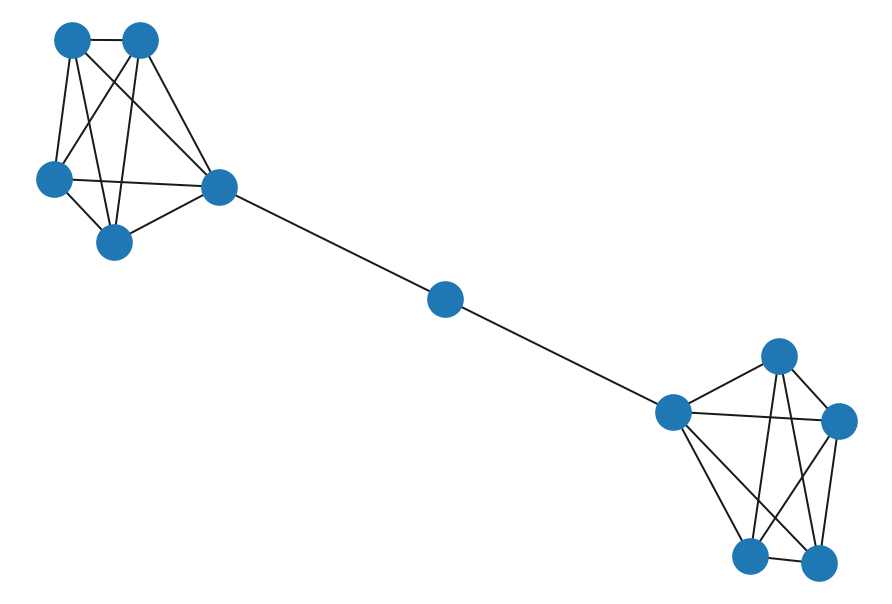

In [30]:
nx.draw(nx.barbell_graph(5, 1))

## Recap

In this chapter, you learned the following things:

1. You figured out how to implement the breadth-first-search algorithm to find shortest paths.
1. You learned how to extract subgraphs from a larger graph.
1. You implemented visualizations of subgraphs, which should help you as you communicate with colleagues.
1. You calculated betweenness centrality metrics for a graph, and visualized how they correlated with degree centrality.

## Solutions

Here are the solutions to the exercises above.

In [ ]:
from nams.solutions import paths
import inspect

print(inspect.getsource(paths))